[Video Link](https://youtu.be/UFjq_a_wEgA)

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Setup

In [ ]:
# !gdown --id 1eO-pcOCS3uMhHdGXC448VgGbr2SfsG48
# !gdown --id 1eOsgwhDeQk6P2cQ03wA0HqwfnCABmO14
# !gdown --id 1ekw_CXsanhaKGIalusVQ_v7unsYMb_2I
# !gdown --id 1egYvsIniJATvFwSeC74511c89w7A41mM
# !gdown --id 1eRE5l5LFPUcrFKd90gj3bxDJxDX2PQIy
# !gdown --id 1ec2zsX4Ft0n0pjuf81C7-nHj4YVu7V3i

In [ ]:
path = "/content/drive/MyDrive/CMU Classwork/95885-Data-Science-and-Big-Data/project-1/"
orders = pd.read_csv(path+'dataset/orders.csv')
orders_prior = pd.read_csv(path+'dataset/order_products__prior.csv')
aisles = pd.read_csv(path+'dataset/aisles.csv')
departments = pd.read_csv(path+'dataset/departments.csv')
products = pd.read_csv(path+'dataset/products.csv')
orders_train = pd.read_csv(path+'dataset/order_products__train.csv')

## Colab Quick-load

In [ ]:
# Convenience cell to make reloading the master_df faster when restarting colab session 
path = "/content/drive/MyDrive/CMU Classwork/95885-Data-Science-and-Big-Data/project-1/" # For Naman
# path = "/content/drive/MyDrive/" # For Akshay
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(path+'master.csv')

Mounted at /content/drive


## Examining tables

In [ ]:
# For Akshay

# orders = pd.read_csv(path+'orders.csv')
# orders_prior = pd.read_csv(path+'order_products__prior.csv')
# aisles = pd.read_csv(path+'aisles.csv')
# departments = pd.read_csv(path+'departments.csv')
# products = pd.read_csv(path+'products.csv')
# orders_train = pd.read_csv(path+'order_products__train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Orders

In [ ]:
# In the orders table we have details of each order that is part of the dataset
# User ID identifies the customer that placed the order
# Eval set tells us which order this is a part of (either prior order, or in the training set)
# dow and hour_of_day tell us what day of week and hour of day this order was placed
# days_since_prior_order tells us how many days it has been since the user's last order with Instacart

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


### Orders Prior

In [ ]:
# Here we have the information of prior orders 
# We have data around how often each product has been ordered, historically. 
# add_to_cart tells us the qty ordered
# Reordered indicates if the item was ordered again 
orders_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


### Aisles

In [ ]:
# This is a dictionary table, that tells us what each aisle_id translates to
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### Departments

In [ ]:
# Another dictionary table, maps d id to d name
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


### Products

In [ ]:
# This maps each product ID to information about the product
# i.e., name, aisle, department 
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### Orders Train

In [ ]:
# This is the training set. Since the dataset is aimed at training an ML model, which is not our end goal,
# we can get more value out of our analyses by merging everything into one master dataset
orders_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


### Orders

In [ ]:
# 75k rows belong to test set, which we do not have access to. 
# We can drop these rows. 
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

Removing unavailable test data

In [ ]:
orders = orders.loc[orders.eval_set != 'test', :]

In [ ]:
orders.shape

(3346083, 7)

## Merging

It fits our use case better to create a master dataset with all individual tables merged

In [ ]:
# Merging orders with orders_prior, orders_train
df = orders.merge(
    pd.concat([orders_prior, orders_train]), 
    how='left',
    on='order_id',
)
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered'],
      dtype='object')

In [ ]:
# Merging with product info, department info, aisle info
df = df.merge(
    products, 
    how='left',
    on='product_id'
).merge(
    departments, 
    how='left',
    on='department_id'
).merge(
    aisles, 
    how='left',
    on='aisle_id'
)
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'department', 'aisle'],
      dtype='object')

We don't need the ID columns anymore.

In [ ]:
df.drop(
    ['eval_set', 'product_id', 
        'aisle_id', 'department_id'],
    axis=1,
    inplace=True
)
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,department,aisle
0,2539329,1,1,2,8,NaN,1,0,Soda,beverages,soft drinks
1,2539329,1,1,2,8,NaN,2,0,Organic Unsweetened Vanilla Almond Milk,dairy eggs,soy lactosefree
2,2539329,1,1,2,8,NaN,3,0,Original Beef Jerky,snacks,popcorn jerky
3,2539329,1,1,2,8,NaN,4,0,Aged White Cheddar Popcorn,snacks,popcorn jerky
4,2539329,1,1,2,8,NaN,5,0,XL Pick-A-Size Paper Towel Rolls,household,paper goods


In [ ]:
df.to_csv(path+'master.csv')

# Exploration

## Exploring the individual tables

In [ ]:
# Most populated isle

products.groupby('aisle_id')['product_id'].agg('count').sort_values(ascending=False)

aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: product_id, Length: 134, dtype: int64

In [ ]:
# Most populated department
import pandas as pd
products_merged = pd.merge(
    products, 
    departments, 
    how='inner', 
    on = 'department_id'
)
products_merged
dept_df = products_merged.groupby(
    'department', as_index=False
    )['product_id'].count()

In [ ]:
dept_df.dtypes

department    object
product_id     int64
dtype: object

In [ ]:
dept_df

,department,product_id
0,alcohol,1054
1,babies,1081
2,bakery,1516
3,beverages,4365
4,breakfast,1115
5,bulk,38
6,canned goods,2092
7,dairy eggs,3449
8,deli,1322
9,dry goods pasta,1858


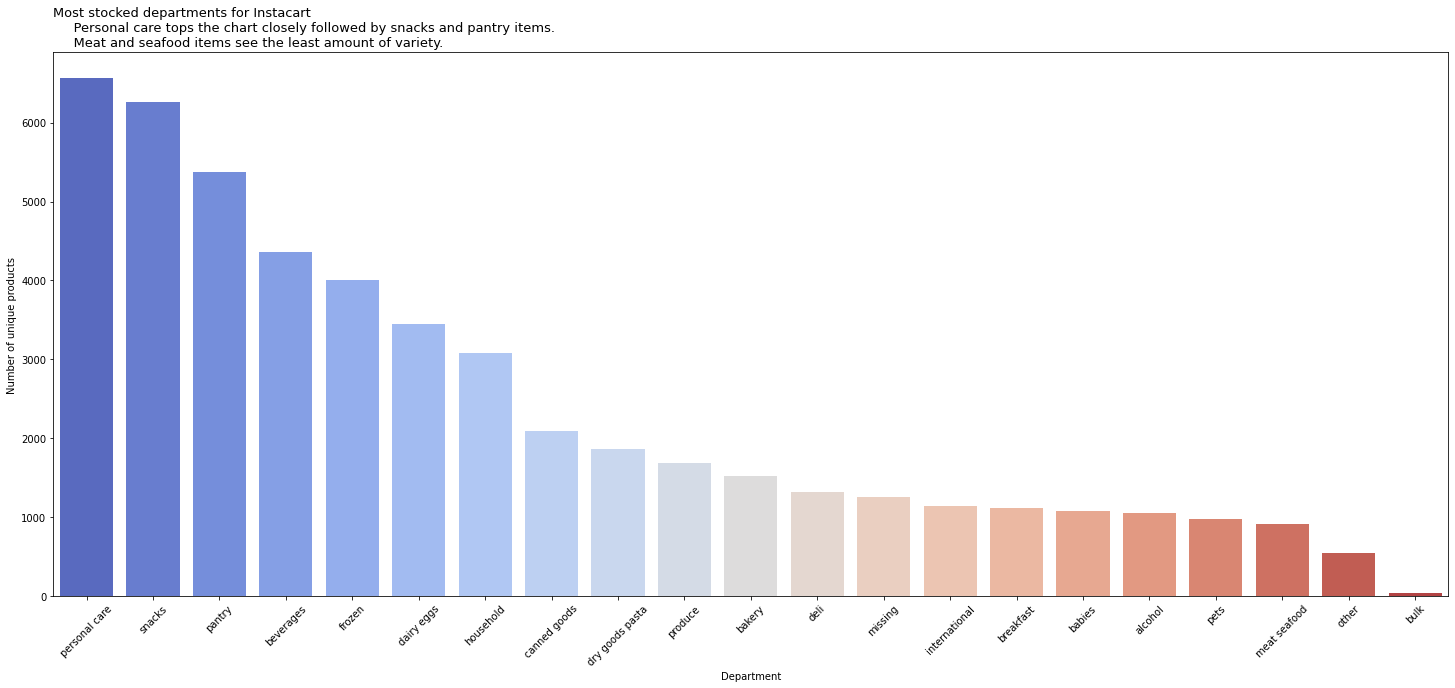

In [ ]:
###### Which department has the most products

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
products_merged = pd.merge(products, departments, 
                           how='inner', on = 'department_id')
products_merged

dept_df = products_merged.groupby(
    'department', as_index=False
    )['product_id'].count()

plt.figure(figsize=(25,10))
sns.barplot(
    x=dept_df.department, 
    y=dept_df.product_id, 
    order = dept_df.sort_values('product_id', ascending=False).department,
    palette='coolwarm'
)

plt.title(
    "Most stocked departments for Instacart\n\
     Personal care tops the chart closely followed by snacks and pantry items.\n\
     Meat and seafood items see the least amount of variety.",
     loc = 'left',
     size = 13
)
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Number of unique products')
plt.show()

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


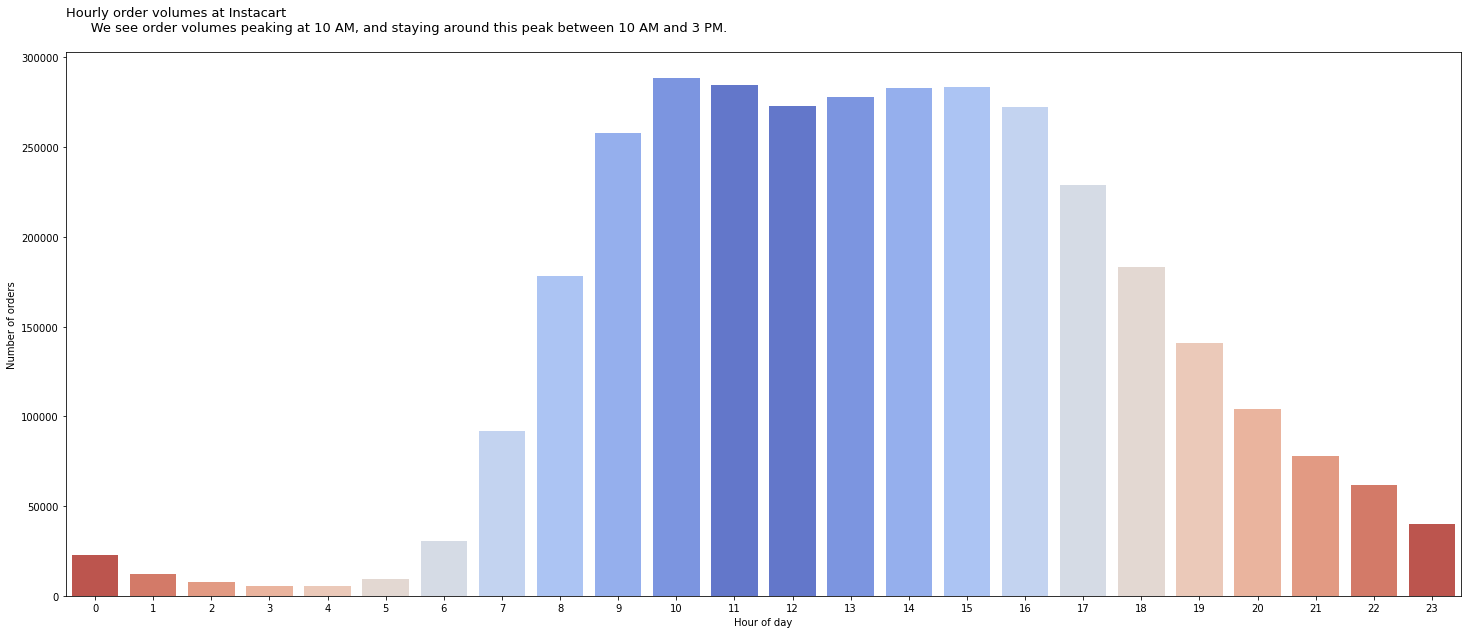

In [ ]:
## At which hour of the day most orders take place

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
midcool = sns.color_palette("coolwarm_r", 12) \
        + sns.color_palette("coolwarm", 12)
hour_df = orders.groupby(
    'order_hour_of_day', as_index=False
    )['order_number'].count()

plt.figure(figsize=(25,10))
sns.barplot(
    x=hour_df.order_hour_of_day, 
    y=hour_df.order_number,
    palette=midcool
)
plt.title(
    "Hourly order volumes at Instacart\n \
     We see order volumes peaking at 10 AM, and staying around this peak between 10 AM and 3 PM.\n",
    loc = 'left',
    size = 13
)
plt.xlabel('Hour of day')
plt.ylabel('Number of orders')
plt.show()

Text(0, 0.5, 'Number of orders')

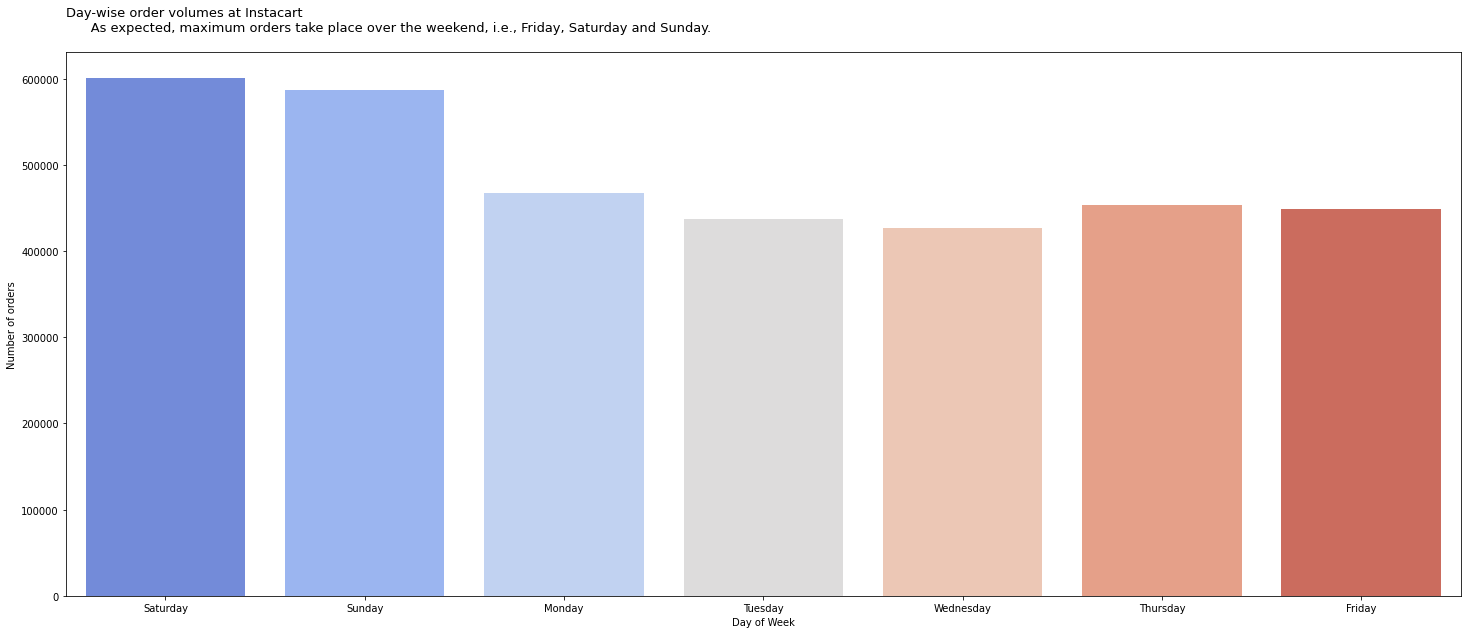

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
week_df = orders.groupby(
    'order_dow', as_index=False
    )['order_number'].count()
week_df['order_dow'] = week_df.order_dow.map(
    {
        0: 'Saturday',
        1: 'Sunday',
        2: 'Monday',
        3: 'Tuesday',
        4: 'Wednesday',
        5: 'Thursday',
        6: 'Friday'
    }
)

plt.figure(figsize=(25,10))
plt.title(
    "Day-wise order volumes at Instacart\n \
     As expected, maximum orders take place over the weekend, i.e., Friday, Saturday and Sunday.\n",
    loc = 'left',
    size = 13
)
sns.barplot(x=week_df.order_dow, y=week_df.order_number, palette = 'coolwarm')
plt.xlabel('Day of Week')
plt.ylabel('Number of orders')

Text(0.0, 1.0, 'Number of orders places in each department\n     We see produce as the highest grossing department')

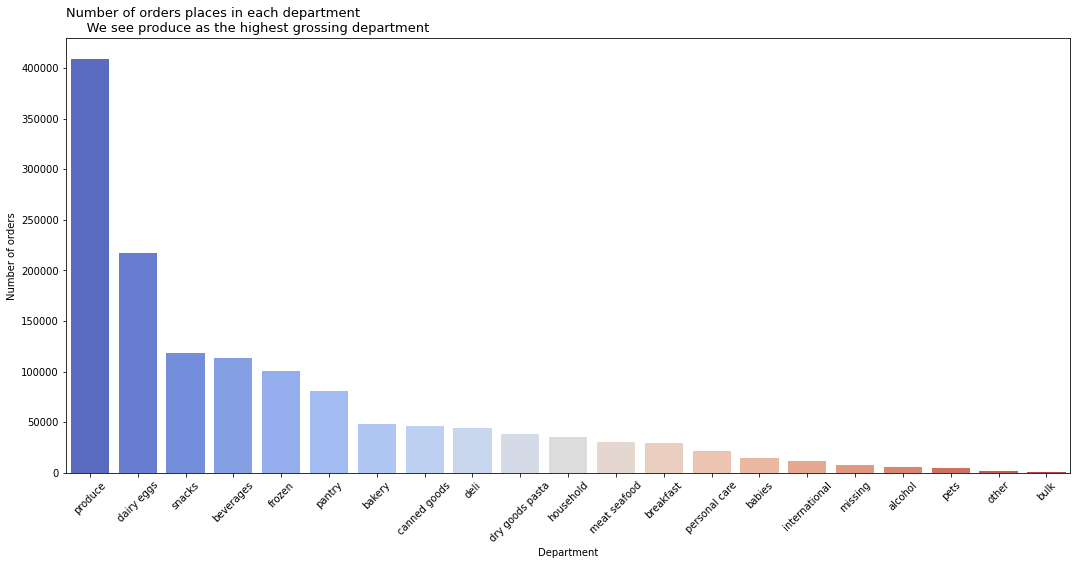

In [ ]:
## Most popular department by orders

products_merged = pd.merge(
    products, departments, how='inner', on = 'department_id'
    )
products_merged = pd.merge(
    products_merged, orders_train, how='inner', on = 'product_id'
    )
pop_df = products_merged.groupby(
    'department', as_index=False
    )['product_id'].count()

plt.figure(figsize=(18,8))
sns.barplot(
    x=pop_df.department,
    y=pop_df.product_id,
    order = pop_df.sort_values('product_id', ascending=False).department,
    palette = 'coolwarm'   
)
plt.xlabel('Department')
plt.ylabel('Number of orders')
plt.xticks(rotation=45)
plt.title(
    "Number of orders places in each department\n\
     We see produce as the highest grossing department",
     loc = 'left',
     size =13
)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

products_merged = pd.merge(
    products, departments, how='inner', on = 'department_id'
    )
products_merged = pd.merge(
    products_merged, orders_train, how='inner', on = 'product_id'
    )
products_merged

,product_id,product_name,aisle_id,department_id,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,snacks,6695,7,1
1,1,Chocolate Sandwich Cookies,61,19,snacks,48361,9,0
2,1,Chocolate Sandwich Cookies,61,19,snacks,63770,4,0
3,1,Chocolate Sandwich Cookies,61,19,snacks,75339,9,0
4,1,Chocolate Sandwich Cookies,61,19,snacks,240996,3,1
...,...,...,...,...,...,...,...,...
1384612,47489,Organic Brown Jasmine Rice,68,10,bulk,1206536,10,0
1384613,47489,Organic Brown Jasmine Rice,68,10,bulk,1532411,5,0
1384614,47489,Organic Brown Jasmine Rice,68,10,bulk,2766182,3,0
1384615,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk,79093,9,0


## Exploring the master dataset (post-merge)

In [ ]:
df.head()

,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,department,aisle
0,0,2539329,1,1,2,8,NaN,1,0,Soda,beverages,soft drinks
1,1,2539329,1,1,2,8,NaN,2,0,Organic Unsweetened Vanilla Almond Milk,dairy eggs,soy lactosefree
2,2,2539329,1,1,2,8,NaN,3,0,Original Beef Jerky,snacks,popcorn jerky
3,3,2539329,1,1,2,8,NaN,4,0,Aged White Cheddar Popcorn,snacks,popcorn jerky
4,4,2539329,1,1,2,8,NaN,5,0,XL Pick-A-Size Paper Towel Rolls,household,paper goods


In [ ]:
len(df['order_number'].unique())

100

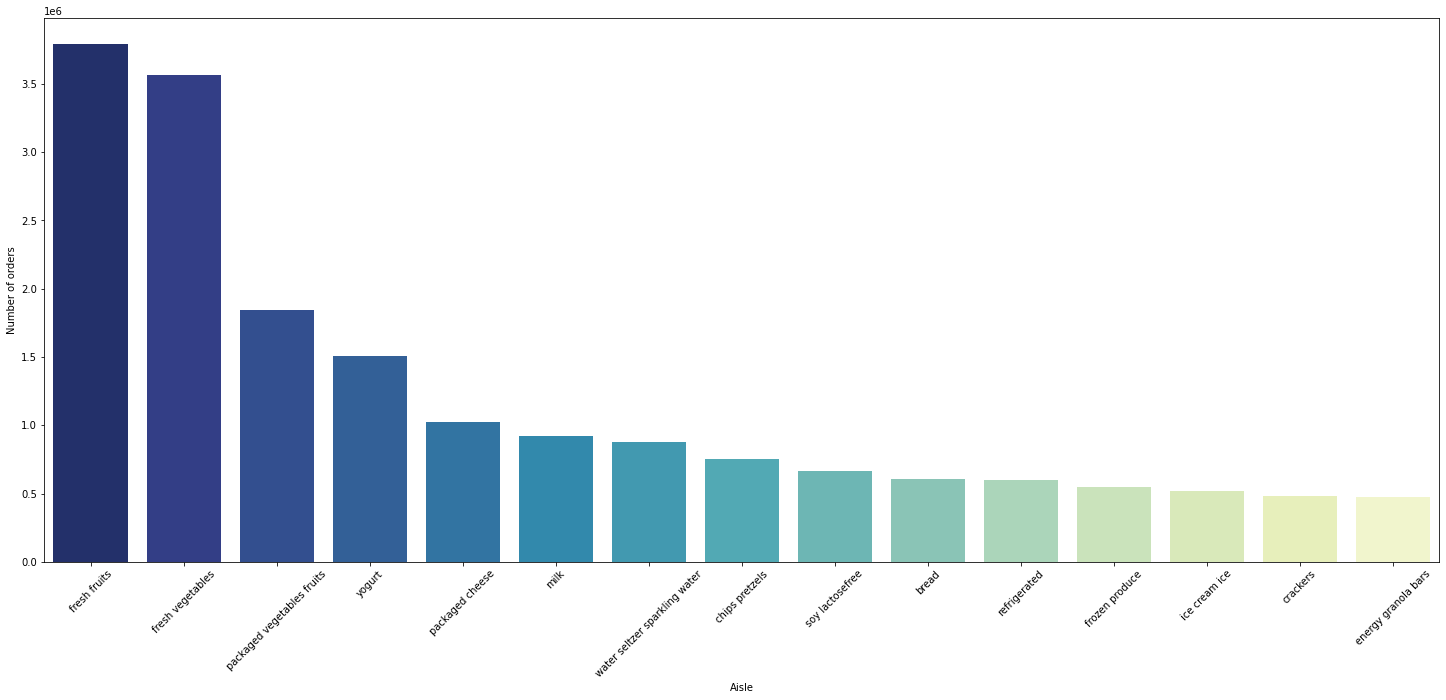

In [ ]:
# Most popular Aisle

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

aisle_df = df.groupby(['aisle'], as_index=False)['order_number'].count()
aisle_df = aisle_df.nlargest(15, 'order_number')
aisle_df

plt.figure(figsize=(25,10))
plt.xticks(rotation=45)
sns.barplot(x=aisle_df.aisle, y=aisle_df.order_number, palette='YlGnBu_r')
plt.xlabel('Aisle')
plt.ylabel('Number of orders')
plt.show()

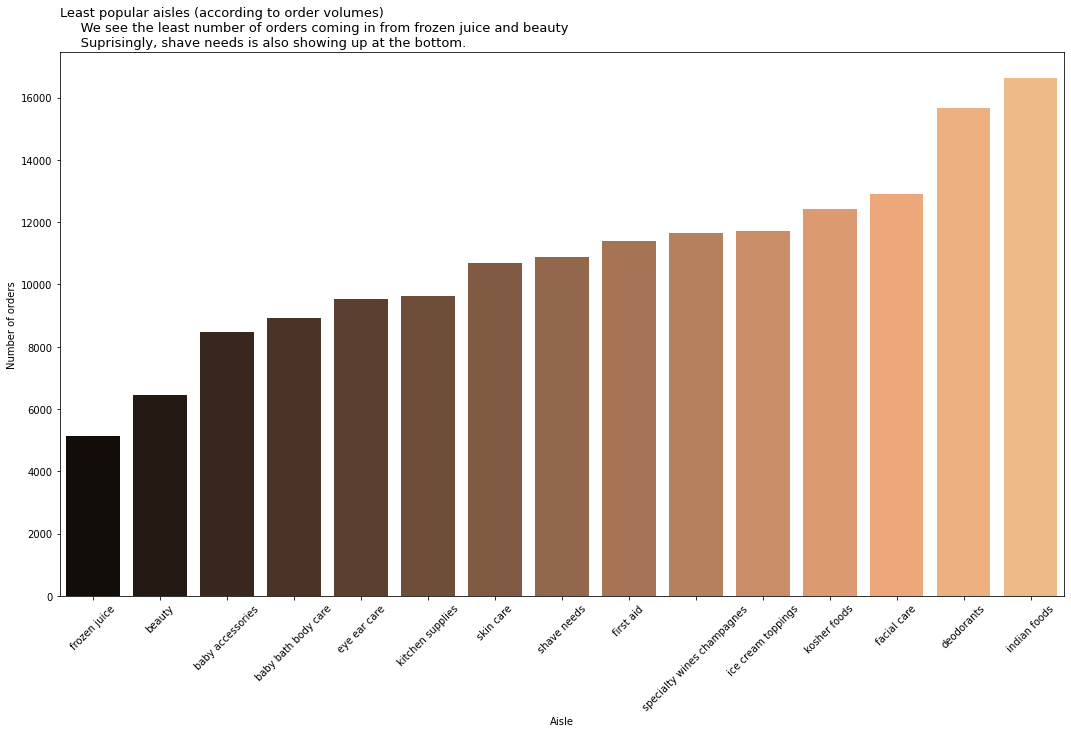

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


aisle_df = df.groupby(['aisle'], as_index=False)['order_id'].count()
aisle_df = aisle_df.nsmallest(15, 'order_id')
aisle_df


plt.figure(figsize=(18,10))
sns.barplot(
    x=aisle_df.aisle,
    y=aisle_df.order_id,
    palette = 'copper'
)
plt.title(
    "Least popular aisles (according to order volumes)\n\
     We see the least number of orders coming in from frozen juice and beauty\n\
     Suprisingly, shave needs is also showing up at the bottom.",
     loc='left',
     size=13
)
plt.xlabel('Aisle')
plt.ylabel('Number of orders')
plt.xticks(rotation=45)
plt.show()

### Order volumes across the week (daily) and across the day (hourly)

In [ ]:
# Days are currently numerically encoded. 
df.order_dow.value_counts()

Saturday     6533692
Sunday       5871834
Friday       4707583
Thursday     4386443
Monday       4378360
Tuesday      3998498
Wednesday    3942696
Name: order_dow, dtype: int64

In [ ]:
# Let's change them back to text
df['order_dow'] = df.order_dow.map(
    {
        0: 'Saturday',
        1: 'Sunday',
        2: 'Monday',
        3: 'Tuesday',
        4: 'Wednesday',
        5: 'Thursday',
        6: 'Friday'
    }
)
# Changing to ordinal categorical
df['order_dow'] = pd.Categorical(
    df['order_dow'], 
    'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split()
)

In [ ]:
# Changing to ordinal categorical
df['order_dow'] = pd.Categorical(
    df['order_dow'], 
    'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split()
)

In [ ]:
# Overall 
df_day_hour_pivot2 = pd.pivot_table(
    df,
    columns = 'order_hour_of_day',
    index = ['order_dow'],
    values = 'order_id',
    aggfunc = 'count'
)
df_day_hour_pivot2.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
Monday,30957,15250,8693,7352,7144,13243,45158,127152,231210,339918,...,348250,347439,343865,289659,236761,178193,136254,106898,83471,54400
Tuesday,28513,14205,9111,6093,7196,12253,42426,115125,206371,288048,...,316153,326788,318655,272577,222248,171472,127118,104338,84872,52408
Wednesday,25740,14281,8434,6596,7182,12560,41609,118105,201808,280837,...,309373,312141,309872,264970,216530,176132,135829,112755,93557,56777
Thursday,30890,16057,9894,8704,9232,15368,48189,134439,232906,327762,...,360662,357337,340423,282285,227529,174797,130929,103320,82167,56194
Friday,32927,19106,11830,8334,8302,11264,33954,122135,249400,330184,...,409374,395975,371404,308051,240851,181069,137183,117633,96182,65829


In [ ]:
# By department
df_day_hour_pivot = pd.pivot_table(
    df,
    columns = 'order_hour_of_day',
    index = ['department','order_dow'],
    values = 'order_id',
    aggfunc = 'count'
)
df_day_hour_pivot.head()

order_hour_of_day     0   1   2   3   4   5    6    7    8     9   ...    14  \
department order_dow                                               ...         
alcohol    Monday     80  57  42  21  20  28  101  324  753  1278  ...  1982   
           Tuesday    60  51  29  19  29  51  126  314  694  1467  ...  2272   
           Wednesday  86  35  42  31  33  48   99  325  919  2078  ...  2561   
           Thursday   97  65  25  26  33  39  139  395  988  2081  ...  2744   
           Friday     87  59  62  42  30  55  103  330  710  1122  ...  2069   

order_hour_of_day       15    16    17    18    19   20   21   22   23  
department order_dow                                                    
alcohol    Monday     2145  2036  1700  1328   880  490  306  226  155  
           Tuesday    2316  2306  1829  1341   911  582  326  253  177  
           Wednesday  2658  2421  1990  1495   982  569  331  265  170  
           Thursday   2626  2468  2122  1681  1067  566  268  186  124  
           Friday     2107  1993  1755  1201   789  416  241  168  115  

[5 rows x 24 columns]

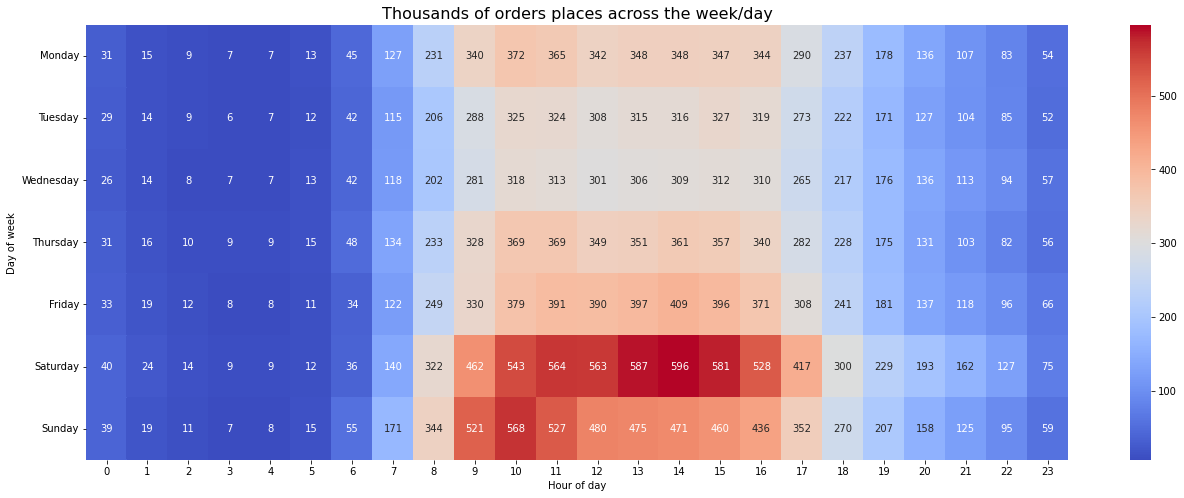

In [ ]:
# How does the order volume change thorught the week and throughout the day? 
midwarm = sns.color_palette("coolwarm", 12) + sns.color_palette("coolwarm_r", 12)
midcool = sns.color_palette("coolwarm_r", 12) + sns.color_palette("coolwarm", 12)

plt.figure(figsize = (22,8))
plt.title('Thousands of orders places across the week/day', {'fontsize':16})
sns.heatmap(
    df_day_hour_pivot2.apply(
        lambda col : col.apply(
            lambda x : round(x/1000)
        )
    ),
    annot=True,
    fmt = 'g',
    cmap = 'coolwarm'
)
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.yticks(rotation=0)
plt.show()

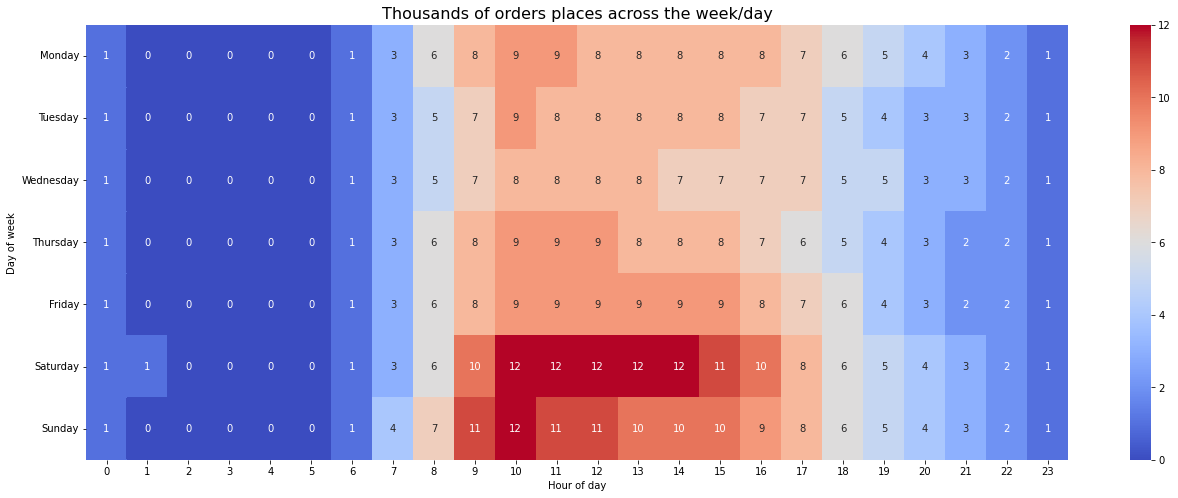

In [ ]:
# How does the order volume change thorught the week and throughout the day? 
midwarm = sns.color_palette("coolwarm", 12) + sns.color_palette("coolwarm_r", 12)
midcool = sns.color_palette("coolwarm_r", 12) + sns.color_palette("coolwarm", 12)

plt.figure(figsize = (22,8))
plt.title('Thousands of orders places across the week/day', {'fontsize':16})
sns.heatmap(
    df_day_hour_pivot.loc['household'].apply(
        lambda col : col.apply(
            lambda x : round(x/1000)
        )
    ),
    annot=True,
    fmt = 'g',
    cmap = 'coolwarm'
)
plt.ylabel('Day of week')
plt.xlabel('Hour of day')
plt.yticks(rotation=0)
plt.show()

Is the order volume trend different across departments?

In [ ]:
# Let us look at our top 20 departments
top10deps = list(df.department.value_counts().index)[:20]
top10deps

['produce',
 'dairy eggs',
 'snacks',
 'beverages',
 'frozen',
 'pantry',
 'bakery',
 'canned goods',
 'deli',
 'dry goods pasta',
 'household',
 'meat seafood',
 'breakfast',
 'personal care',
 'babies',
 'international',
 'alcohol',
 'pets',
 'missing',
 'other']

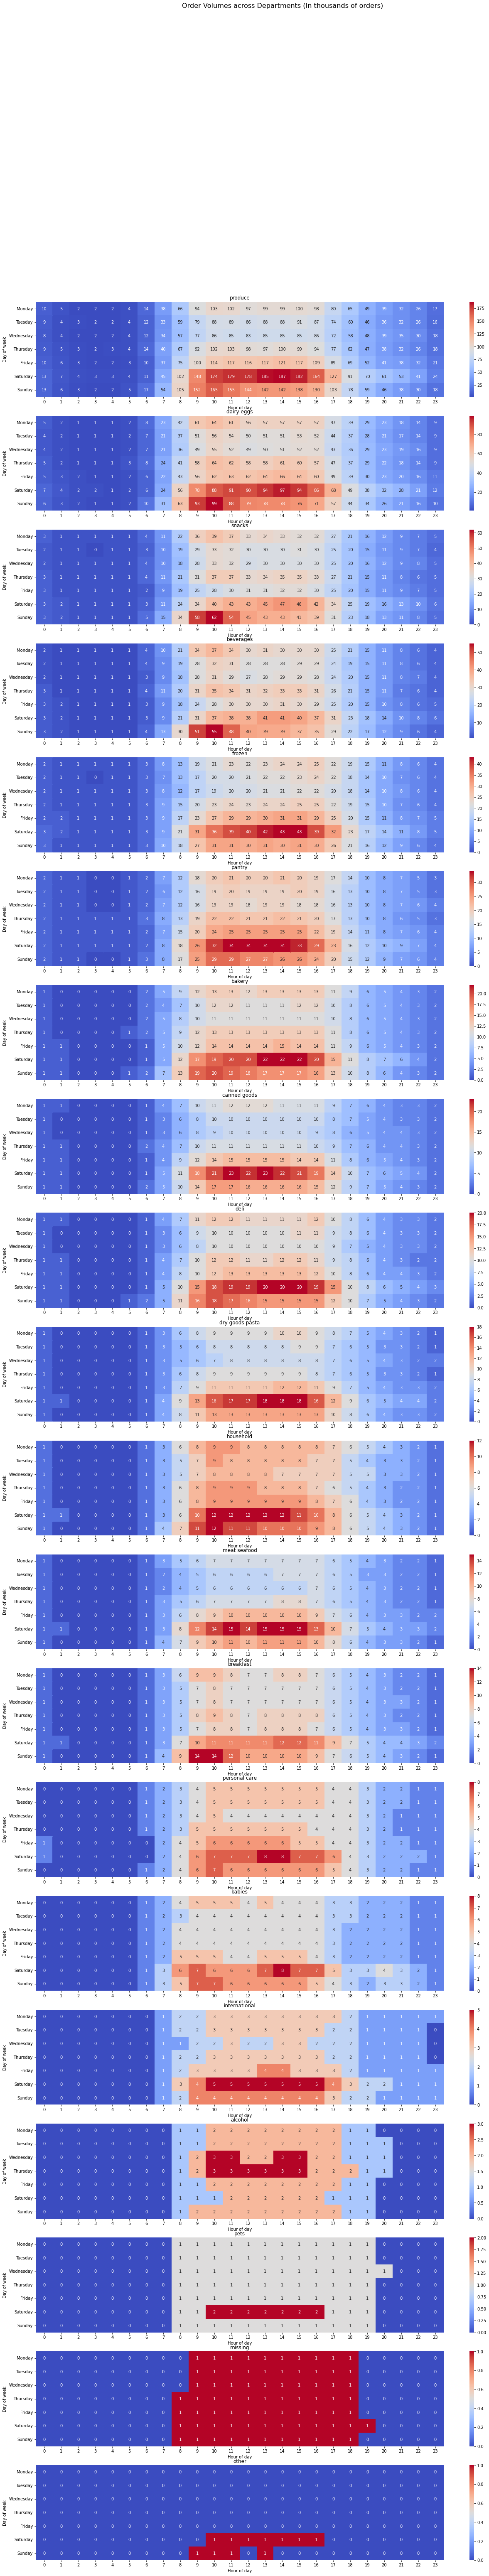

In [ ]:
fig, axes = plt.subplots(20,1, figsize = (22, 100), sharey = True)
fig.suptitle('Order Volumes across Departments (In thousands of orders)', 
             fontsize = 16)
for i, dep in enumerate(top10deps):
  sns.heatmap(
      ax = axes[i],
      # Changing the values to indicate thousands 
      data = df_day_hour_pivot.loc[dep].apply(
          lambda col : col.apply(
              lambda x : round(x/1000)
          )
      ),
      annot=True,
      fmt = 'g',
      cmap = 'coolwarm'
  )
  axes[i].set_title(dep)
  axes[i].set(xlabel='Hour of day', ylabel='Day of week')
#   plt.ylabel('Day of week')
#   plt.xlabel('Hour of day')
  plt.yticks(rotation=0)

**Inference**

A general trend can be seen to idnicate the most shopping on Instacrt occurs on Sundays and Mondays. Howevever, something that strikes out is that this trend is not as pronounces in the personal care and babies category. This indicates a uniform demand for these products throughout the week and throughout the active hours of 8 AM to 5 PM.

In [ ]:
df.head()

,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,product_name,department,aisle
0,0,2539329,1,1,2,8,NaN,1,0,Soda,beverages,soft drinks
1,1,2539329,1,1,2,8,NaN,2,0,Organic Unsweetened Vanilla Almond Milk,dairy eggs,soy lactosefree
2,2,2539329,1,1,2,8,NaN,3,0,Original Beef Jerky,snacks,popcorn jerky
3,3,2539329,1,1,2,8,NaN,4,0,Aged White Cheddar Popcorn,snacks,popcorn jerky
4,4,2539329,1,1,2,8,NaN,5,0,XL Pick-A-Size Paper Towel Rolls,household,paper goods


### Orders placed by the same user

In [ ]:
user_orders=df.groupby(
    by = ['user_id']
)['order_id'].count().sort_values(ascending=False)
user_orders

user_id
201268    3725
129928    3689
164055    3089
176478    2952
186704    2936
          ... 
11877        3
38979        3
122081       3
150668       3
188345       3
Name: order_id, Length: 206209, dtype: int64

In [ ]:
user_orders = pd.DataFrame(
    {'user_id' : list(user_orders.index),
     'orders' : list(user_orders.values)}
)

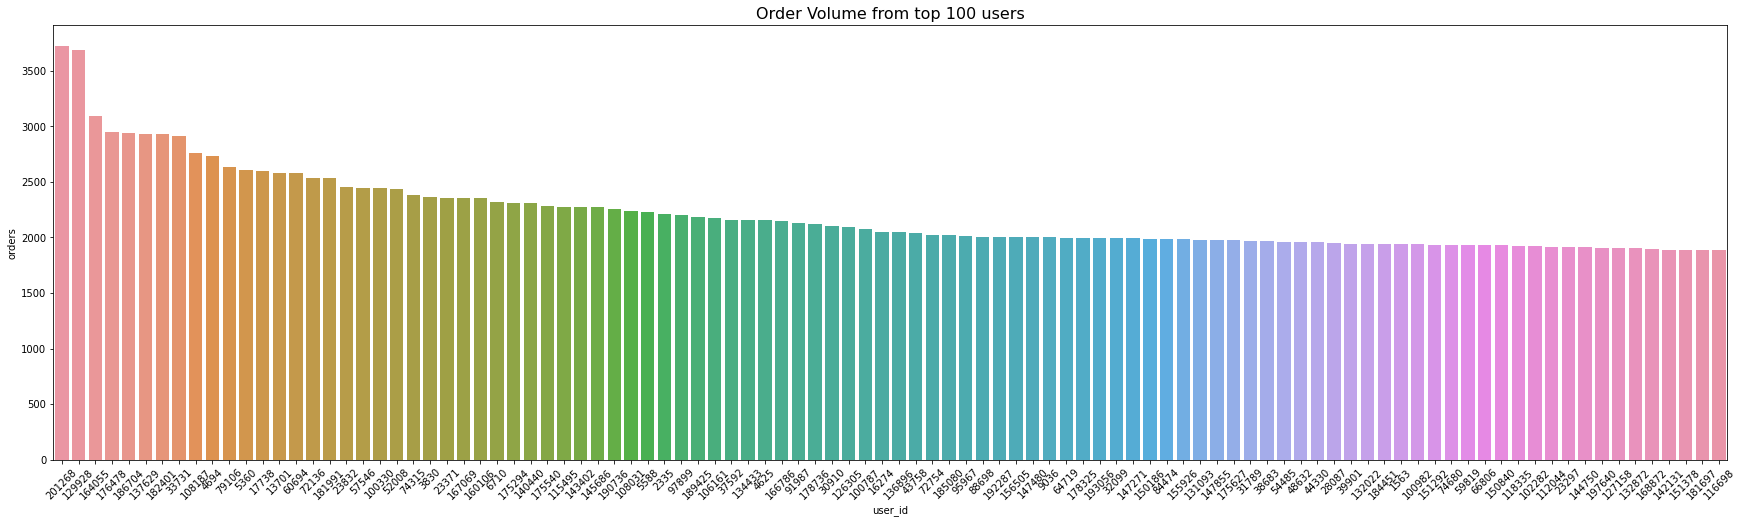

In [ ]:
plt.figure(figsize = (30,8))
plt.title('Order Volume from top 100 users', {'fontsize':16})
plt.xticks(rotation = 45)
sns.barplot(
    data = user_orders[:100],
    x = 'user_id',
    y = 'orders',
    order = user_orders[:100].sort_values(by = 'orders', ascending = False).user_id
)

There are clearly several users that make up a huge portion of instacart's orders. These could be high value customers

In [ ]:
user_orders.head()

,user_id,orders
0,201268,3725
1,129928,3689
2,164055,3089
3,176478,2952
4,186704,2936


### How important are the top buyers?

In [ ]:
total_orders = user_orders.orders.sum()

We will try to identify the users that contribute to 10% of the total order volume for the Instacart. 

In [ ]:
user_orders['ten_percent'] = user_orders.apply(
    lambda x : False if (user_orders.loc[0:int(x.name), 'orders']).sum() > \
    total_orders*0.1 else True,
    axis = 1
)

In [ ]:
round(user_orders.ten_percent.value_counts()*100/len(user_orders), 2)

False    98.64
True      1.36
Name: ten_percent, dtype: float64

Interesting! Only 1.36% of the users contribute to a massive 10% of Instacart's total order volume.

In [ ]:
df_user_orders = user_orders.groupby(
    'ten_percent'
).agg(
    {
        'orders' : ['sum'],
        'user_id' : ['size']
    }
).reset_index()
df_user_orders.columns = ['ten_percent', 'num_of_orders', 'num_of_users']
# df_user_orders.columns.droplevel(0)
# # df_user_orders = df_user_orders.rename_axis(None, axis=1)
df_user_orders

,ten_percent,num_of_orders,num_of_users
0,False,30437745,203404
1,True,3381361,2805


In [ ]:
df_user_orders_melted = df_user_orders.melt(
    value_vars = ['num_of_orders', 'num_of_users'], 
    id_vars = 'ten_percent'
)
df_user_orders_melted

,ten_percent,variable,value
0,False,num_of_orders,30437745
1,True,num_of_orders,3381361
2,False,num_of_users,203404
3,True,num_of_users,2805


In [ ]:
top_10_buyers_orders = df_user_orders_melted.loc\
    [df_user_orders_melted.variable == 'num_of_orders']
tot = top_10_buyers_orders.value.sum()
top_10_buyers_orders.loc[:,'portion'] = top_10_buyers_orders.value.apply(
    lambda x : x/tot
)
top_10_buyers = df_user_orders_melted.loc\
    [df_user_orders_melted.variable == 'num_of_users']
tot = top_10_buyers.value.sum()
top_10_buyers.loc[:,'portion'] = top_10_buyers.value.apply(
    lambda x : x/tot
)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


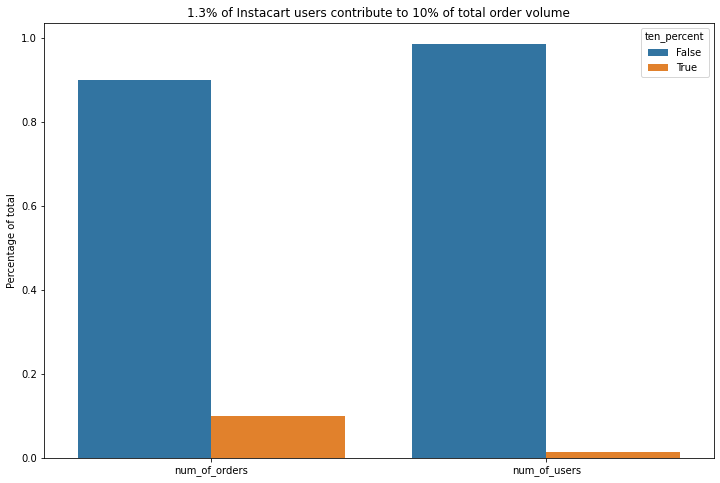

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(
    data=pd.concat([top_10_buyers_orders, top_10_buyers]),
    x='variable', 
    hue="ten_percent",
    y='portion',
    # estimator=lambda x: sum(x==0)*100.0/len(x)
)
plt.xlabel('')
plt.ylabel('Percentage of total')
plt.title(
    '1.3% of Instacart users contribute to 10% of total order volume'
)
plt.show()

**Inference**
We can note that 10% of the total order volume for the store is driven by 1.3% of the user base

### Reordered products

Some items must be reordered more often than the rest, and some might never get reordered. 

In [ ]:
reordered_products = df.groupby(
    by = ['product_name', 'aisle','department']
)['reordered'].sum()
reordered_products

product_name                                                     aisle           department
#2 Coffee Filters                                                coffee          beverages     265
#2 Cone White Coffee Filters                                     coffee          beverages       3
#2 Mechanical Pencils                                            more household  household       0
#4 Natural Brown Coffee Filters                                  coffee          beverages      90
& Go! Hazelnut Spread + Pretzel Sticks                           spreads         pantry         93
                                                                                              ... 
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum  mint gum        snacks         17
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum        mint gum        snacks         20
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum           mint gum        snacks         34
with a Splash of 

How many times was each product reordered?

In [ ]:
reordered_products=pd.DataFrame(
    reordered_products
).reset_index()
reordered_products.sort_values(by = 'reordered', ascending=False)

,product_name,aisle,department,reordered
3677,Banana,fresh fruits,produce,415166
3472,Bag of Organic Bananas,fresh fruits,produce,329275
31923,Organic Strawberries,fresh fruits,produce,214448
28843,Organic Baby Spinach,packaged vegetables fruits,produce,194939
30300,Organic Hass Avocado,fresh fruits,produce,176173
...,...,...,...,...
3081,Au Jus Base,soup broth bouillon,canned goods,0
3082,Au Jus Gravy,marinades meat preparation,pantry,0
45962,Turkey Bacon Bits,hot dogs bacon sausage,meat seafood,0
12288,Day and Night Multi-Symptom and Severe Cold & ...,cold flu allergy,personal care,0


Aisles from which the most reorders take place

In [ ]:
reordered_aisles = reordered_products.groupby(
    by = 'aisle'
)['reordered'].sum()
reordered_aisles = pd.DataFrame(
    reordered_aisles
).reset_index()
reordered_aisles.sort_values(by = 'reordered', ascending=False)[:20]

,aisle,reordered
50,fresh fruits,2726251
53,fresh vegetables,2123540
98,packaged vegetables fruits,1178700
133,yogurt,1034957
83,milk,722128
131,water seltzer sparkling water,640988
93,packaged cheese,598280
119,soy lactosefree,460069
25,chips pretzels,444036
11,bread,408010


Aisles where the least reordered products are placed

In [ ]:
least_popular_aisles = reordered_aisles.sort_values(
    by = 'reordered', ascending=True
)[:20]
least_popular_aisles

,aisle,reordered
8,beauty,1374
76,kitchen supplies,1874
44,eye ear care,2100
47,first aid,2235
58,frozen juice,2327
115,skin care,2598
3,baby bath body care,2626
114,shave needs,2864
72,ice cream toppings,3140
34,deodorants,3743


In [ ]:
# Let's see what the least re-ordered products are from these unpopular aisles
reordered_products.sort_values(by = 'reordered', ascending=True)[:20]

,product_name,aisle,department,reordered
25937,Miso Paste,asian foods,international,0
14077,"Everyday 8.5\"" Plates",missing,missing,0
14090,Everyday Coconut Nighttime Replenishment Face ...,skin care,personal care,0
37574,Red Cake Icing,baking supplies decor,pantry,0
46513,Ultragel Personal Lubricant,other,other,0
37573,Red Cabbage with Apple,canned jarred vegetables,canned goods,0
3737,Banana Yogurt & Fruit Juice Blend,baby food formula,babies,0
14101,Everyday Insulated Cups,plates bowls cups flatware,household,0
37564,Red Bell Pepper Ancho Chili Jam,spreads,pantry,0
14115,Everyday Shea Lemon & Lavender Body Lotion Gen...,baby bath body care,babies,0


#### Unpopular Aisles

Now that is odd. We have several products that were downright _never_ reordered. 

Is this random, or can we find a trend? Let's dig deeper.

In [ ]:
# All products that were never reordered
never_reordered = reordered_products[reordered_products.reordered == 0]
# Let's see what aisles these are from
df_never_reordered=pd.DataFrame(
    never_reordered.groupby(
      by = ['aisle', 'department']
    )['product_name'].count()
).reset_index().sort_values(by='product_name', ascending=False)
df_never_reordered[:50]

,aisle,department,product_name
83,missing,missing,271
127,vitamins supplements,personal care,207
119,spices seasonings,pantry,186
65,hair care,personal care,136
7,baking supplies decor,pantry,110
74,kitchen supplies,household,103
89,other,other,94
16,candy chocolate,snacks,93
84,more household,household,90
27,cold flu allergy,personal care,87


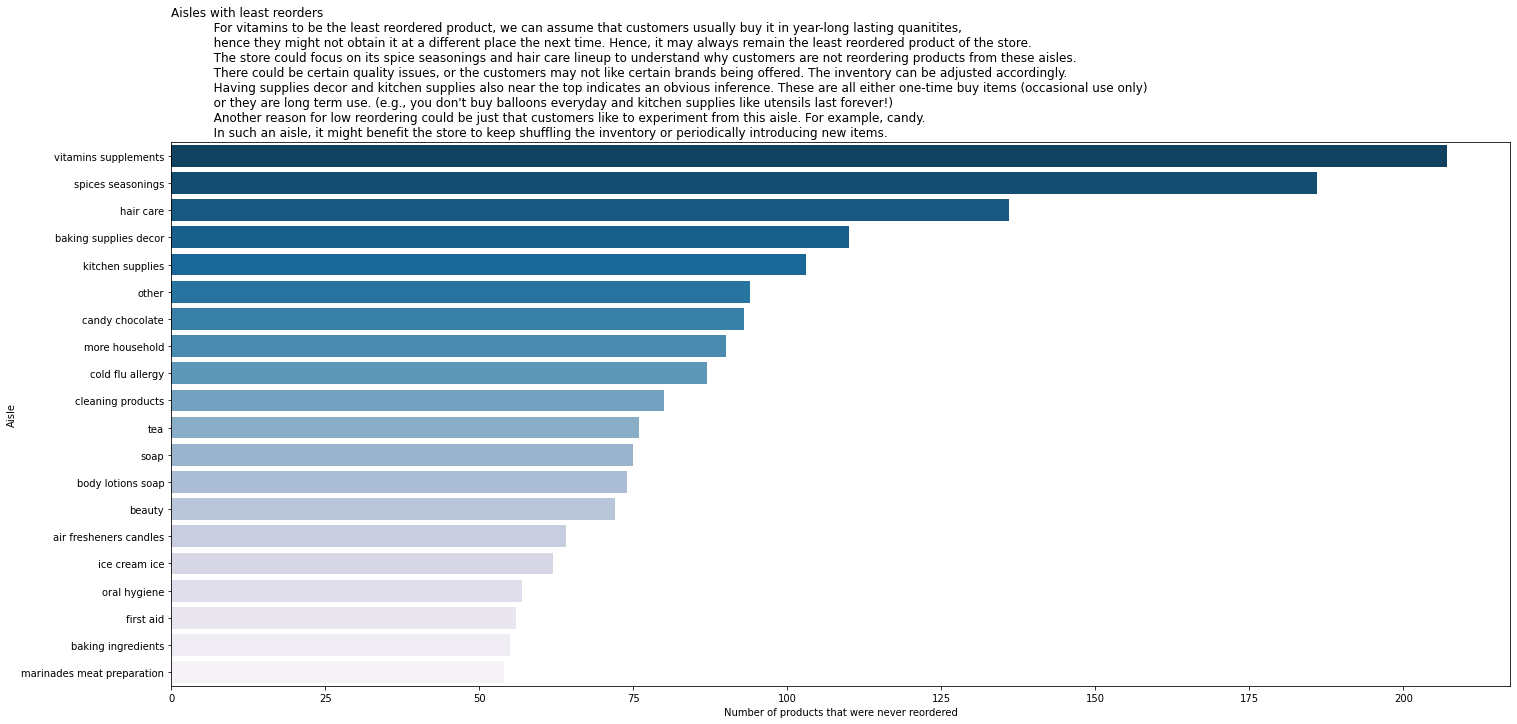

In [ ]:
# Let us visualize the unpopular aisles
plt.figure(figsize = (24,10))
plt.title("Aisles with least reorders\n\
           For vitamins to be the least reordered product, we can assume that customers usually buy it in year-long lasting quanitites, \n\
           hence they might not obtain it at a different place the next time. Hence, it may always remain the least reordered product of the store.\n\
           The store could focus on its spice seasonings and hair care lineup to understand why customers are not reordering products from these aisles. \n\
           There could be certain quality issues, or the customers may not like certain brands being offered. The inventory can be adjusted accordingly.\n\
           Having supplies decor and kitchen supplies also near the top indicates an obvious inference. These are all either one-time buy items (occasional use only) \n\
           or they are long term use. (e.g., you don't buy balloons everyday and kitchen supplies like utensils last forever!)\n\
           Another reason for low reordering could be just that customers like to experiment from this aisle. For example, candy. \n\
           In such an aisle, it might benefit the store to keep shuffling the inventory or periodically introducing new items.", size=12, loc = 'left')
fig=sns.barplot(
    data=df_never_reordered[1:21], # dropping the 'missing' aisle 
    y='aisle',
    x = 'product_name',
    order=df_never_reordered[1:21].sort_values(
        by='product_name', 
        ascending=False
    ).aisle,
    palette= 'PuBu_r'
)
fig.set_xlabel('Number of products that were never reordered')
fig.set_ylabel('Aisle')
plt.show()

**Inferences**

* For vitamins to be the least reordered product, we can assume that customers usually buy it in year-long lasting quanitites, hence they might not obtain it at a different place the next time. Hence, it may always remain the least reordered product of the store. 
* The store could focus on its spice seasonings and hair care lineup to understand why customers are not reordering products from these aisles. There could be certain quality issues, or the customers may not like certain brands being offered. The inventory can be adjusted accordingly.
* Having supplies decor and kitchen supplies also near the top indicates an obvious inference. These are all either one-time buy items (occasional use only) or they are long term use. (e.g., you don't buy balloons everyday and kitchen supplies like utensils last forever!)
* Another reason for low reordering could be just that customers like to experiment from this aisle. For example, candy. In such an aisle, it might benefit the store to keep shuffling the inventory or periodically introducing new items.

### How does each department perform in terms of reorders?

In [ ]:
reorder_ratios = pd.DataFrame(
    df.groupby(
        by = 'department'
    )['reordered'].mean()
).reset_index()
min_ratio = reorder_ratios.reordered.min()
max_ratio = reorder_ratios.reordered.max()
reorder_ratios['min_max'] = reorder_ratios.reordered.apply(
    lambda x : 1 if x == min_ratio else (2 if x == max_ratio else 0))

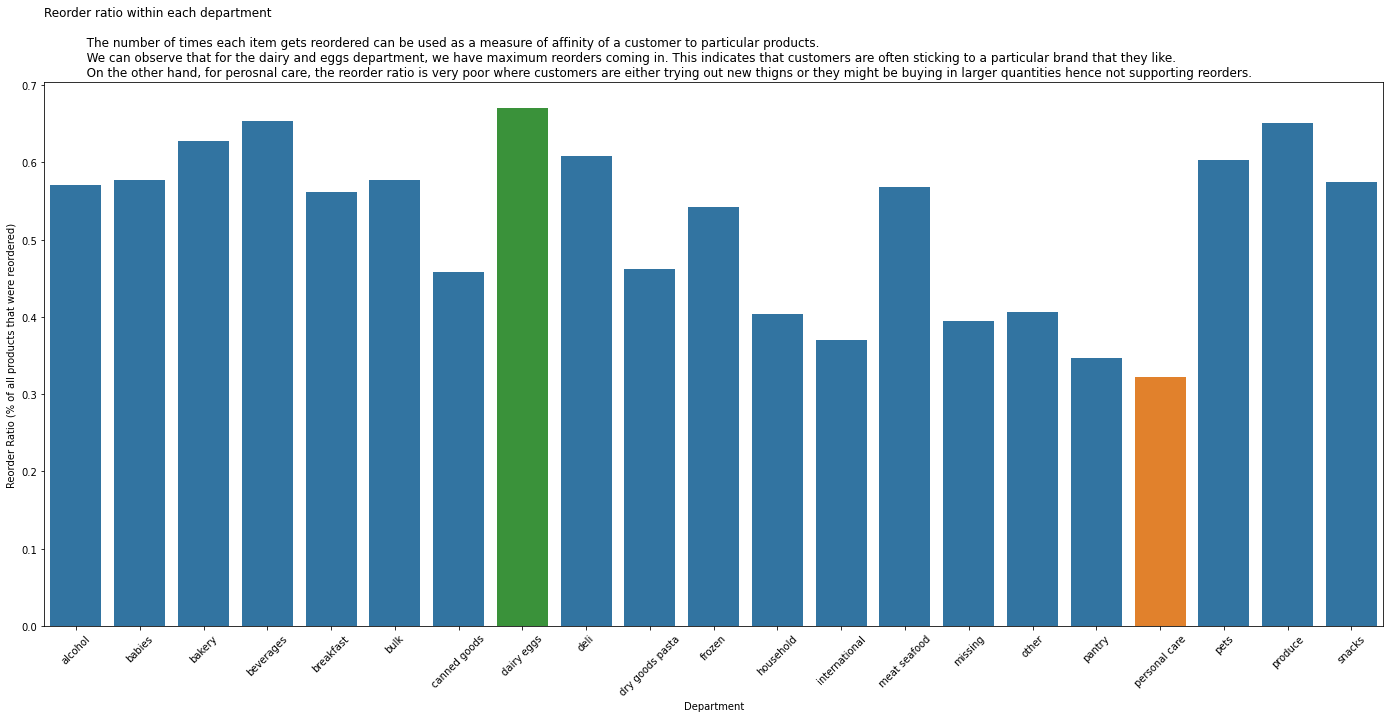

In [ ]:
plt.figure(figsize = (24,10))
plt.title('Reorder ratio within each department\n\n\
           The number of times each item gets reordered can be used as a measure of affinity of a customer to particular products.\n\
           We can observe that for the dairy and eggs department, we have maximum reorders coming in. This indicates that customers are often sticking to a particular brand that they like.\n\
           On the other hand, for perosnal care, the reorder ratio is very poor where customers are either trying out new thigns or they might be buying in larger quantities hence not supporting reorders.', size=12, loc = 'left')
fig = sns.barplot(
    data = reorder_ratios,
    x = 'department',
    y = 'reordered',
    hue = 'min_max',
    dodge = False
)
fig.set_xlabel('Department')
fig.set_ylabel('Reorder Ratio (% of all products that were reordered)')
plt.legend([],[], frameon=False)
plt.xticks(rotation=45)
plt.show()

In [ ]:
product_orders = df.groupby(
    by = ['department', 'aisle', 'product_name']
)['product_name'].count()
product_orders.rename('orders', inplace=True)
product_orders

department  aisle                product_name                                   
alcohol     beers coolers        'Swingtop' Premium Lager                               1
                                 12 Oz Beer                                           252
                                 12 Oz Lager                                          389
                                 1500 Pale Ale                                         61
                                 1664                                                  17
                                                                                    ...  
snacks      trail mix snack mix  Traditional Snack Mix                               2327
                                 Trail Mix                                          12601
                                 Tram Bar Peanut Butter Milk Chocolate Trail Mix        7
                                 Tropical Trail Mix                                   214
                   

In [ ]:
product_orders_df = pd.DataFrame(product_orders).reset_index()
product_orders_df.sort_values(by='orders', ascending=False)

,department,aisle,product_name,orders
41762,produce,fresh fruits,Banana,491291
41760,produce,fresh fruits,Bag of Organic Bananas,394930
42016,produce,fresh fruits,Organic Strawberries,275577
43129,produce,packaged vegetables fruits,Organic Baby Spinach,251705
41977,produce,fresh fruits,Organic Hass Avocado,220877
...,...,...,...,...
39681,personal care,soap,Tangerine Melon Bubble Bath,1
45660,snacks,cookies cakes,7.04 Oz. Grahamfuls Banana Vanilla 8ct,1
45659,snacks,cookies cakes,11.3 Oz. Oreo Fudge Creme Double Chocolate,1
34400,personal care,body lotions soap,Anjou Pear Hand Soap,1


In [ ]:
top_100_products = product_orders_df.sort_values(
    by='orders', 
    ascending=False
)[:100]

NameError: ignored

In [ ]:
# Let's construct a dataframe which tells us what items were in every order
items_in_order = df.groupby(
    by='order_id'
).agg(
    {
        'product_name': lambda x : x.ravel().tolist()
    }
).reset_index()
items_in_order

,order_id,product_name
0,1,"[Bulgarian Yogurt, Organic 4% Milk Fat Whole M..."
1,2,"[Organic Egg Whites, Michigan Organic Kale, Ga..."
2,3,[Total 2% with Strawberry Lowfat Greek Straine...
3,4,"[Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr..."
4,5,"[Bag of Organic Bananas, Just Crisp, Parmesan,..."
...,...,...
3346078,3421079,[Moisture Soap]
3346079,3421080,"[Organic Whole Milk, Vanilla Bean Ice Cream, O..."
3346080,3421081,"[Hint of Lime Flavored Tortilla Chips, Classic..."
3346081,3421082,"[Fresh 99% Lean Ground Turkey, Original Spray,..."


In [ ]:
len(df.product_name.unique())

49685

In [ ]:
# Let's what are the different "pairs" in each order
from itertools import combinations
combos = [list(combinations(row, 2)) for row in items_in_order['product_name']]
combos[:5]

In [ ]:
user_orders[:100]

user_id
201268    3725
129928    3689
164055    3089
176478    2952
186704    2936
          ... 
168872    1898
142131    1887
151378    1886
181697    1885
116698    1883
Name: order_id, Length: 100, dtype: int64

In [ ]:
user_orders = pd.DataFrame(
    {'user_id' : list(user_orders.index),
     'orders' : list(user_orders.values)}
)

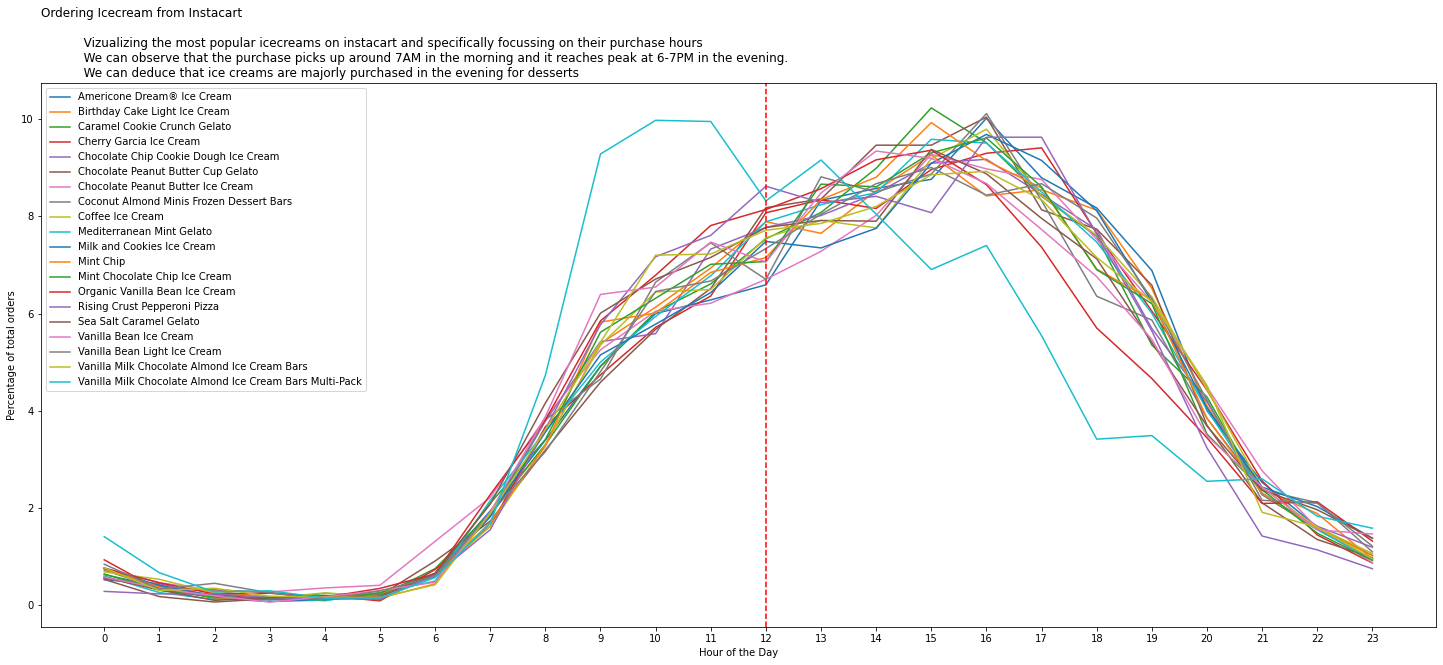

In [ ]:
# Ordering Icecream from Instacart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# df = pd.read_csv('master.csv')
ice_cream_df = df[df["product_name"].str.contains("Half Baked Frozen Yogurt|The Tonight Dough™ Ice Cream|Americone Dream® Ice Cream|Half Raked Ice Cream|Phish Food® Ice Cream|Milk and Cookies Ice Cream|Sicilian Pistachio|Chocolate Peanut Butter Cup Gelato|Birthday Cake Light Ice Cream|Cherry Garcia Ice Cream|Strawberry Cream|Vanilla Bean Light Ice Cream|Coffee Ice Cream|Roman Raspberry Sorbetto|Mediterranean Mint Gelato|Caramel Cookie Crunch Gelato|Chocolate Chip Cookie Dough Ice Cream|Mint Chip|Coconut Almond Minis Frozen Dessert Bars|Mint Chocolate Chip Ice Cream|Chocolate Peanut Butter Ice Cream|Vanilla Milk Chocolate Almond Ice Cream Bars|Sea Salt Caramel Gelato|Vanilla Bean Ice Cream|Rising Crust Pepperoni Pizza")]
ice_cream_df = ice_cream_df.groupby(
    'product_name'
).agg(
    {"order_hour_of_day" : lambda x: sorted(list(x)), 
     "order_id":"count"
     }
)
ice_cream_df['%'] = ice_cream_df['order_id']*100/ice_cream_df['order_id'].sum()
ice_cream_df = ice_cream_df.sort_values(by=['%'], ascending=False)
ice_cream_df = ice_cream_df.head(20)
def f(val):
  l = val['order_hour_of_day']
  return (dict((x, l.count(x)*100/val['order_id']) for x in set(l)))
ice_cream_df['hour_dict'] = ice_cream_df.apply(lambda x: f(x), axis = 1)

plt.figure(figsize=(25,10))
plt.title('Ordering Icecream from Instacart\n\n\
           Vizualizing the most popular icecreams on instacart and specifically focussing on their purchase hours\n\
           We can observe that the purchase picks up around 7AM in the morning and it reaches peak at 6-7PM in the evening.\n\
           We can deduce that ice creams are majorly purchased in the evening for desserts', size=12, loc = 'left')

gk = ice_cream_df.groupby("product_name")
for product_name, prod_group in gk:
    ax = sns.lineplot(
        x=prod_group['hour_dict'][0].keys(),
        y=prod_group['hour_dict'][0].values(),
        label=product_name,
    )
ax.set_xticks([x for x in range(0, 24)])
ax.set_xticklabels([x for x in range(0, 24)])
ax.set(ylabel='Percentage of total orders', xlabel='Hour of the Day')
plt.axvline(12, 0 , 10, color='red', linestyle="--")
plt.show()

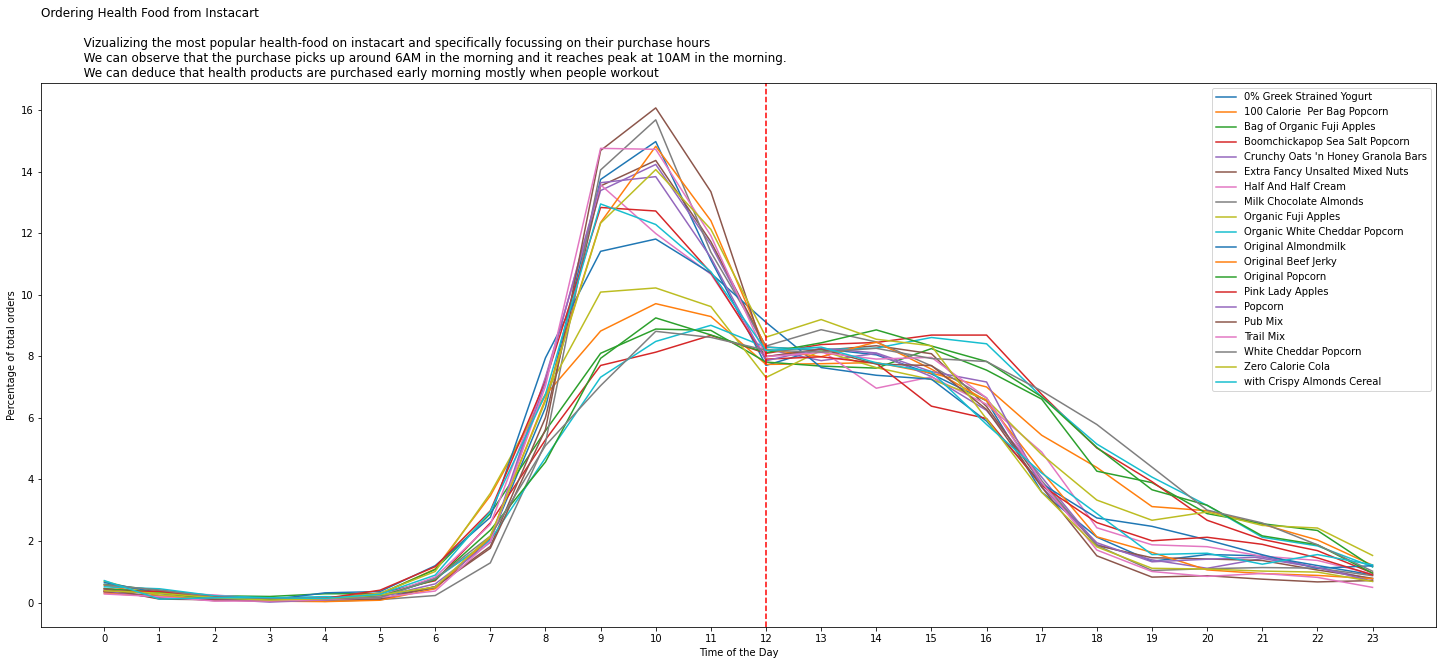

In [ ]:
# Ordering Health food from instacart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# df = pd.read_csv('master.csv')
healthy_df = df[df["product_name"].str.contains("Half And Half Ultra Pasteurized|Sweet & Salty Nut Granola Bars Peanut|Pub Mix|Nutri Grain Bars Multi Pack|Trail Mix|Original Rice Krispies Treats|Organic Fuji Apples|Cheez-It Baked Snack Crackers|Dry Roasted Almonds|Zero Calorie Cola|Crunchy Oats 'n Honey Granola Bars|Original Beef Jerky|Cheez-It Cheddar Cracker|Popcorn|Milk Chocolate Almonds|0% Greek Strained Yogurt|Extra Fancy Unsalted Mixed Nuts|Pink Lady Apples|with Crispy Almonds Cereal|Original Almondmilk|Half And Half Cream|French Vanilla Coffee Creamer|Orange & Lemon Flavor Sparkling Fruit Beverage|Cinnamon Brown Sugar Breakfast Biscuits")]
healthy_df = healthy_df.groupby('product_name').agg(
    {
     "order_hour_of_day" : lambda x: sorted(list(x)), 
     "order_id":"count"
     }
)
healthy_df['%'] = healthy_df['order_id']*100/healthy_df['order_id'].sum()
healthy_df = healthy_df.sort_values(by=['%'], ascending=False)
healthy_df = healthy_df.head(20)
def f(val):
  l = val['order_hour_of_day']
  return (dict((x, l.count(x)*100/val['order_id']) for x in set(l)))
healthy_df['hour_dict'] = healthy_df.apply(lambda x: f(x), axis = 1)

plt.figure(figsize=(25,10))
plt.title('Ordering Health Food from Instacart\n\n\
           Vizualizing the most popular health-food on instacart and specifically focussing on their purchase hours\n\
           We can observe that the purchase picks up around 6AM in the morning and it reaches peak at 10AM in the morning.\n\
           We can deduce that health products are purchased early morning mostly when people workout', size=12, loc = 'left')

gk = healthy_df.groupby("product_name")
for product_name, prod_group in gk:
    ax = sns.lineplot(
        x=prod_group['hour_dict'][0].keys(),
        y=prod_group['hour_dict'][0].values(),
        label=product_name,
    )
ax.set_xticks([x for x in range(0, 24)])
ax.set_xticklabels([x for x in range(0, 24)])
ax.set(ylabel='Percentage of total orders', xlabel='Hour of the Day')
plt.axvline(12, 0 , 10, color='red', linestyle="--")
plt.show()